<a href="https://colab.research.google.com/github/sanislearning/S7-CSE-AI-Deep-Learning-Lab/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from keras import models,layers
from keras.datasets import cifar10
from keras.utils import to_categorical

In [21]:
#load CIFAR-10 dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#normalizing pixel values to be between 0 and 1
x_train,x_test=x_train/255.0,x_test/255.0

In [22]:
print(f'x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}\ny_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [23]:
#Convert labels to one-hot encoding
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [24]:
print(f'x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}\ny_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [25]:
model=models.Sequential()

#Flatten the input for the fully connected layer
model.add(layers.Flatten(input_shape=(32,32,3)))

#Three hidden layers with ReLU activation
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(128,activation="relu"))

#Output layer with softmax activation for classification
model.add(layers.Dense(10,activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#Display the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.2709 - loss: 1.9947 - val_accuracy: 0.3861 - val_loss: 1.7118
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.3882 - loss: 1.7003 - val_accuracy: 0.4284 - val_loss: 1.5935
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4225 - loss: 1.6101 - val_accuracy: 0.4554 - val_loss: 1.5285
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4469 - loss: 1.5418 - val_accuracy: 0.4598 - val_loss: 1.5244
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.4643 - loss: 1.4978 - val_accuracy: 0.4579 - val_loss: 1.5318
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.4725 - loss: 1.4664 - val_accuracy: 0.4664 - val_loss: 1.5066
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.4819 - loss: 1.4467 - val_accuracy: 0.4686 - val_loss: 1.5020
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4972 -

In [30]:
score=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4995 - loss: 1.4234


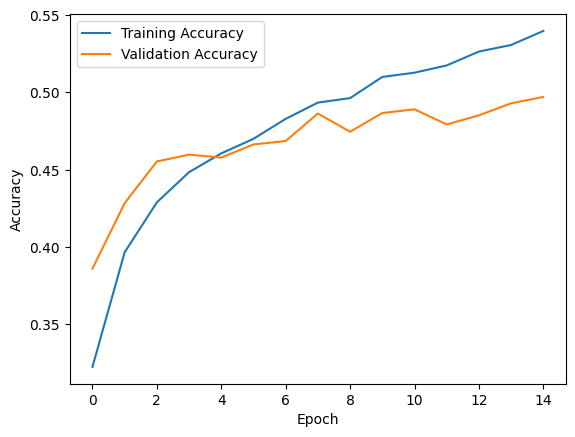

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np

In [33]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1) #predicted labels
y_true=np.argmax(y_test,axis=1) #actual labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


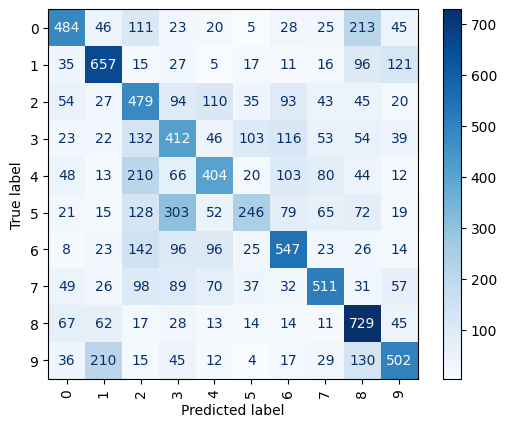

In [35]:
cm=confusion_matrix(y_true,y_pred_classes)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap="Blues",xticks_rotation="vertical")